<a href="https://colab.research.google.com/github/Flaviasoz/social-media-productivity/blob/main/analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 2: Análise Exploratória de Dados (EDA)

**Objetivo**: Explorar relações e padrões nos dados processados  
**Dataset**: processed_data.csv  
**Autor**: Flávia Souza e Vinicius Loeblein

## 1. Configuração Inicial

In [177]:
!pip install -q kagglehub pdfkit weasyprint
!apt-get update && apt-get install -y wkhtmltopdf

import os
import pandas as pd
import numpy as np
from scipy import stats
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess
import nbformat
from nbconvert import HTMLExporter
from weasyprint import HTML
import pdfkit
from google.colab import files


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [178]:
os.makedirs("imgs_temp", exist_ok=True)
def load_from_github():
    """Tenta carregar o dataset diretamente do GitHub"""
    github_url = "https://raw.githubusercontent.com/Flaviasoz/social-media-productivity/main/data/processed_data.csv"
    try:
        response = requests.get(github_url)
        response.raise_for_status()  # Verifica se houve erro na requisição
        df = pd.read_csv(StringIO(response.text))
        print("Dataset carregado com sucesso do GitHub!")
        return df
    except Exception as e:
        print(f"Não foi possível carregar do GitHub: {str(e)}")
        return None

def load_from_local():
    """Tenta carregar o dataset localmente"""
    # Verifica caminhos locais possíveis
    possible_paths = [
        '../data/processed_data.csv',
        'data/processed_data.csv',
        'processed_data.csv',
        '../processed_data.csv'
    ]

    for path in possible_paths:
        if os.path.exists(path):
            try:
                df = pd.read_csv(path)
                print(f"Dataset carregado localmente de: {path}")
                return df
            except Exception as e:
                print(f"Erro ao ler {path}: {str(e)}")

    print("Arquivo não encontrado nos caminhos locais padrão.")
    return None

def show_available_files():
    """Mostra arquivos disponíveis para ajudar na depuração"""
    print("\nArquivos disponíveis nos diretórios:")
    print("\nDiretório atual:", os.listdir('.'))
    if os.path.exists('../data'):
        print("\nDiretório ../data:", os.listdir('../data'))
    if os.path.exists('data'):
        print("\nDiretório data:", os.listdir('data'))

def upload_manually():
    """Função para upload manual do arquivo"""
    try:
        from google.colab import files
        print("\nExecutando no Google Colab - faça o upload do arquivo:")
        uploaded = files.upload()
        for fn in uploaded.keys():
            df = pd.read_csv(fn)
            print(f"Arquivo {fn} carregado com sucesso!")
            return df
    except:
        try:
            from tkinter import Tk, filedialog
            print("\nSelecione o arquivo manualmente:")
            root = Tk()
            root.withdraw()
            file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
            if file_path:
                df = pd.read_csv(file_path)
                print(f"Arquivo {file_path} carregado com sucesso!")
                return df
        except Exception as e:
            print(f"Erro ao carregar arquivo: {str(e)}")

    print("Nenhum arquivo carregado.")
    return None

# Fluxo principal de carregamento
print("Tentando carregar os dados...")

# 1. Primeiro tenta do GitHub
df = load_from_github()

# 2. Se não conseguir, tenta localmente
if df is None:
    print("\nTentando carregar localmente...")
    df = load_from_local()

# 3. Se ainda não encontrou, mostra opções
if df is None:
    show_available_files()
    print("\nOPÇÕES DISPONÍVEIS:")
    print("1. Verifique se o arquivo está em um dos locais padrão")
    print("2. Execute o notebook de limpeza de dados primeiro")
    print("3. Use o upload manual (descomente a linha abaixo)")
    # df = upload_manually()

# Mostra o dataset se carregou com sucesso
if df is not None:
    print("\nDataset carregado com sucesso!")
    print(f"Shape do dataset: {df.shape}")
    print("\nPrimeiras linhas:")
    display(df.head())
else:
    print("\nNão foi possível carregar o dataset. Verifique as mensagens acima.")

Tentando carregar os dados...
Dataset carregado com sucesso do GitHub!

Dataset carregado com sucesso!
Shape do dataset: (29860, 20)

Primeiras linhas:


,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score,uso_categoria
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688,alto
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427,moderado
2,32,Male,Finance,3.113418,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944,moderado
3,60,Female,Unemployed,3.113418,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670,moderado
4,25,Male,IT,3.113418,Telegram,66,6.214096,8.868753,4.951805,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060,moderado


## 2. Análise Univariada

In [179]:
# Filtrar e copiar para evitar warnings
df = df[df['work_hours_per_day'] > 0].copy()

# Criar nova coluna: produtividade por hora
df['produtividade_por_hora'] = df['actual_productivity_score'] / df['work_hours_per_day']

# Variáveis numéricas e seus títulos e descrições
num_cols = [
    'daily_social_media_time',
    'sleep_hours',
    'actual_productivity_score',
    'produtividade_por_hora'
]

nomes_colunas = {
    'daily_social_media_time': 'Tempo Diário em Redes Sociais (horas)',
    'sleep_hours': 'Horas de Sono',
    'actual_productivity_score': 'Pontuação de Produtividade Real',
    'produtividade_por_hora': 'Produtividade por Hora'
}

descricoes = {
    'daily_social_media_time': 'Distribuição do tempo que os usuários passam diariamente nas redes sociais.',
    'sleep_hours': 'Distribuição das horas de sono registradas pelos usuários.',
    'actual_productivity_score': 'Distribuição das pontuações reais de produtividade.',
    'produtividade_por_hora': 'Distribuição da produtividade calculada por hora trabalhada.'
}

# Variáveis categóricas, títulos, descrições e mapeamento
cat_cols = ['uso_categoria', 'gender']

nomes_cat = {
    'uso_categoria': 'Categoria de Uso',
    'gender': 'Gênero'
}

descricoes_cat = {
    'uso_categoria': 'Frequência das categorias de uso registradas no dataset.',
    'gender': 'Distribuição dos gêneros dos participantes da pesquisa.'
}

mapa_genero = {
    'Male': 'Masculino',
    'Female': 'Feminino',
    'Other': 'Outros'
}


### 2.1 Tempo Diário em Redes Sociais (horas)

Distribuição do tempo que os usuários passam diariamente nas redes sociais.
Média: 3.06 horas


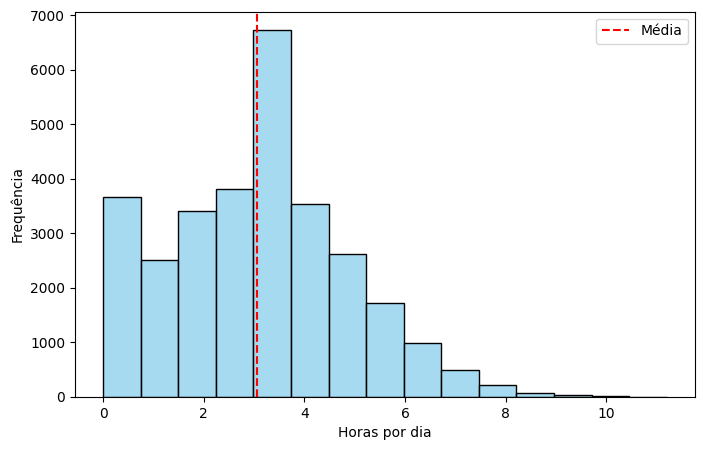

In [180]:
print("Distribuição do tempo que os usuários passam diariamente nas redes sociais.")
print(f"Média: {df['daily_social_media_time'].mean():.2f} horas")
plt.figure(figsize=(8, 5))
sns.histplot(df['daily_social_media_time'], bins=15, kde=False, color='skyblue')
plt.axvline(df['daily_social_media_time'].mean(), color='red', linestyle='--', label='Média')
plt.xlabel('Horas por dia')
plt.ylabel('Frequência')
plt.legend()
plt.savefig("imgs_temp/social_media_time.png")
plt.show()


### 2.2 Horas de Sono

Distribuição das horas de sono registradas pelos usuários.
Média: 6.50 horas


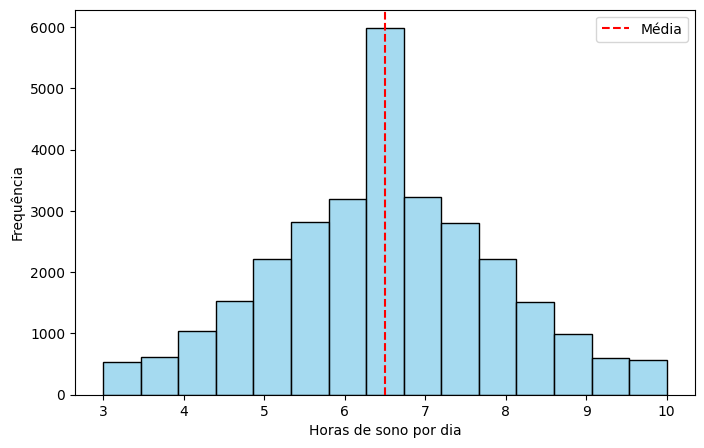

In [181]:
print("Distribuição das horas de sono registradas pelos usuários.")
print(f"Média: {df['sleep_hours'].mean():.2f} horas")

plt.figure(figsize=(8, 5))
sns.histplot(df['sleep_hours'], bins=15, kde=False, color='skyblue')
plt.axvline(df['sleep_hours'].mean(), color='red', linestyle='--', label='Média')
plt.xlabel('Horas de sono por dia')
plt.ylabel('Frequência')
plt.legend()
plt.savefig("imgs_temp/horas_sono.png")
plt.show()

### 2.3 Pontuação de Produtividade Real

Distribuição das pontuações reais de produtividade.
Média: 4.95


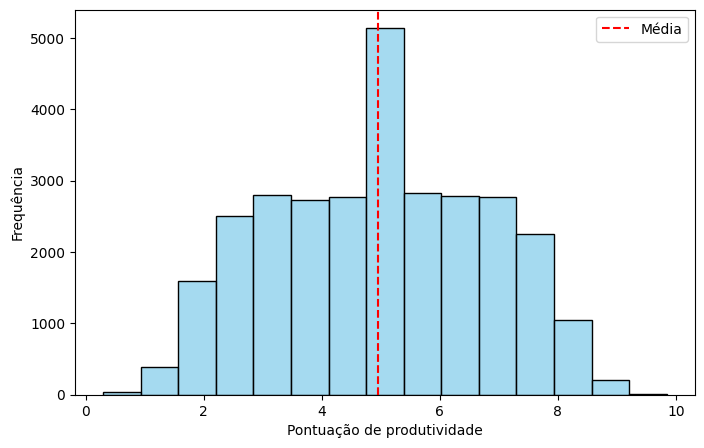

In [182]:
print("Distribuição das pontuações reais de produtividade.")
print(f"Média: {df['actual_productivity_score'].mean():.2f}")

plt.figure(figsize=(8, 5))
sns.histplot(df['actual_productivity_score'], bins=15, kde=False, color='skyblue')
plt.axvline(df['actual_productivity_score'].mean(), color='red', linestyle='--', label='Média')
plt.xlabel('Pontuação de produtividade')
plt.ylabel('Frequência')
plt.legend()
plt.savefig("imgs_temp/prod_real.png")
plt.show()

### 2.4 Distribuição da Categoria de Uso

Frequência das categorias de uso registradas no dataset.


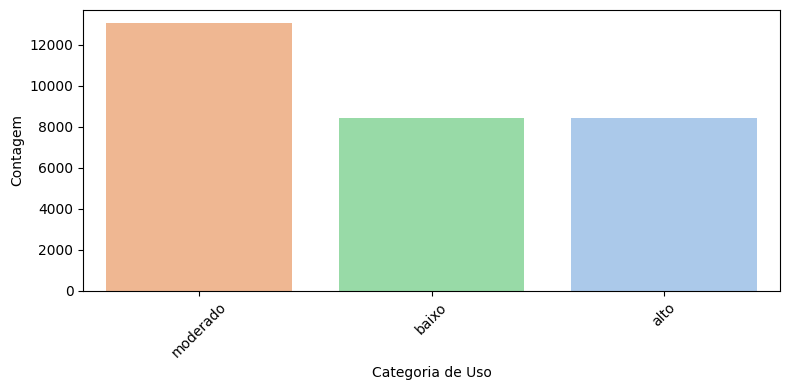

In [183]:
print("Frequência das categorias de uso registradas no dataset.")

plt.figure(figsize=(8, 4))
sns.countplot(
    x='uso_categoria',
    data=df,
    order=df['uso_categoria'].value_counts().index,
    hue='uso_categoria',
    legend=False,
    palette='pastel'
)
plt.xlabel('Categoria de Uso')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("imgs_temp/uso_categoria.png")
plt.show()


### 2.5 Distribuição por Gênero

Distribuição dos gêneros dos participantes da pesquisa.


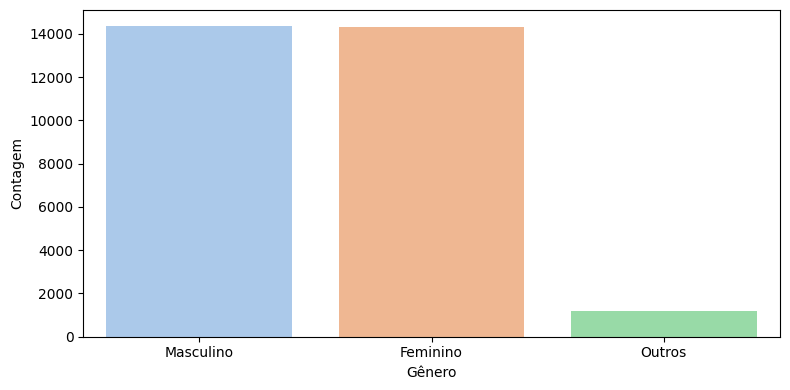

In [184]:
print("Distribuição dos gêneros dos participantes da pesquisa.")

mapa_genero = {'Male': 'Masculino', 'Female': 'Feminino', 'Other': 'Outros'}
df['gender'] = df['gender'].map(mapa_genero).fillna(df['gender'])

plt.figure(figsize=(8, 4))
sns.countplot(
    x='gender',
    data=df,
    order=df['gender'].value_counts().index,
    hue='gender',
    legend=False,
    palette='pastel'
)
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.tight_layout()
plt.savefig("imgs_temp/dist_genero.png")
plt.show()


## 3. Análise Bivariada

### 3.1 Correlação entre variáveis numéricas

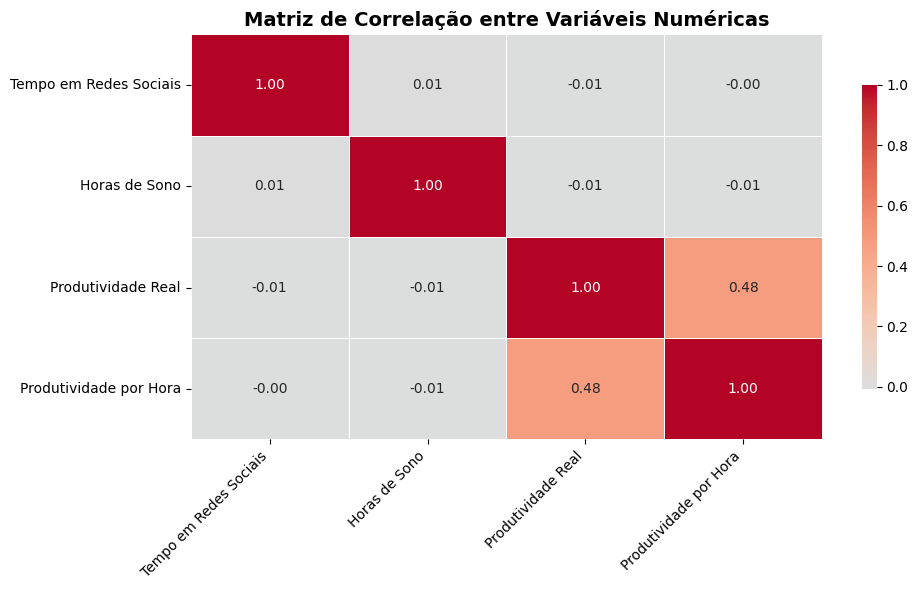

In [185]:
# Dicionário de nomes em português
nomes_em_portugues = {
    'daily_social_media_time': 'Tempo em Redes Sociais',
    'sleep_hours': 'Horas de Sono',
    'actual_productivity_score': 'Produtividade Real',
    'produtividade_por_hora': 'Produtividade por Hora'
}

# Substituir nomes das colunas por português
df_corr = df[num_cols].rename(columns=nomes_em_portugues)

corr_matrix = df_corr.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5, cbar_kws={"shrink": .75})

plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("imgs_temp/variaveis_num.png")
plt.show()

### 3.2 Relação principal: Redes Sociais vs Produtividade

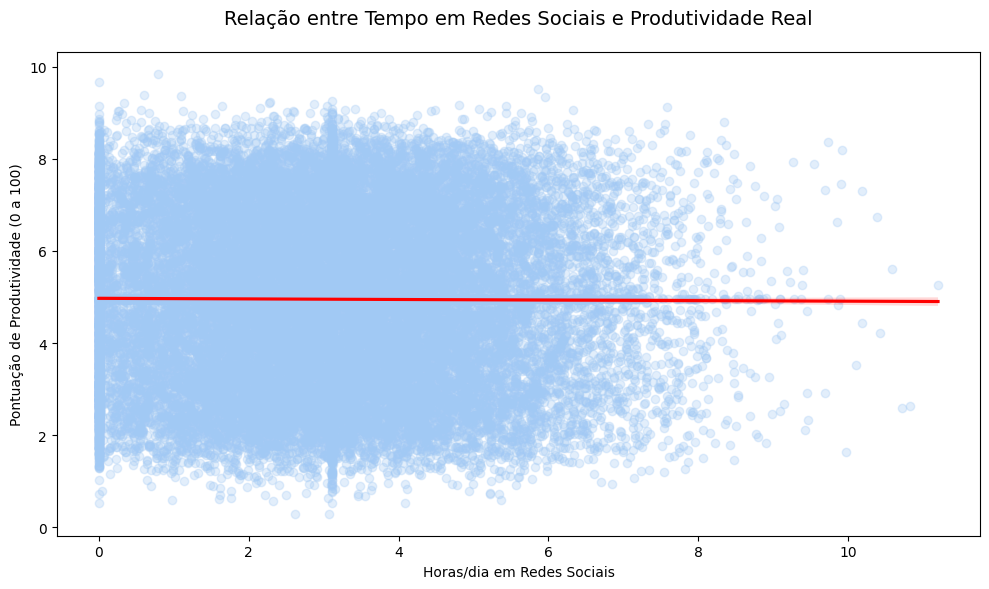

In [186]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='daily_social_media_time',
    y='actual_productivity_score',
    data=df,
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'red'}
)
plt.title('Relação entre Tempo em Redes Sociais e Produtividade Real', pad=20, fontsize=14)
plt.xlabel('Horas/dia em Redes Sociais')
plt.ylabel('Pontuação de Produtividade (0 a 100)')
plt.tight_layout()
plt.savefig("imgs_temp/rsvsprod.png")
plt.show()

## 4. Análise por Segmentos

### 4.1 Produtividade média por categoria de uso

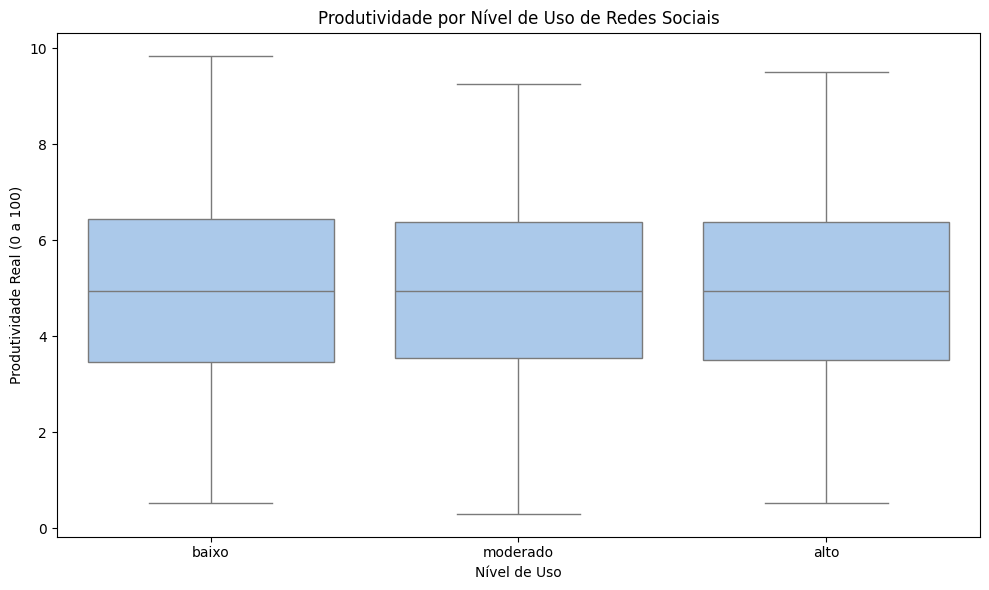

In [187]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='uso_categoria',
    y='actual_productivity_score',
    data=df,
    order=['baixo', 'moderado', 'alto']
)
plt.title('Produtividade por Nível de Uso de Redes Sociais')
plt.xlabel('Nível de Uso')
plt.ylabel('Produtividade Real (0 a 100)')
plt.tight_layout()
plt.savefig("imgs_temp/prod_media_uso.png")
plt.show()

### 4.2 Produtividade Real por Faixas de Tempo em Redes Sociais

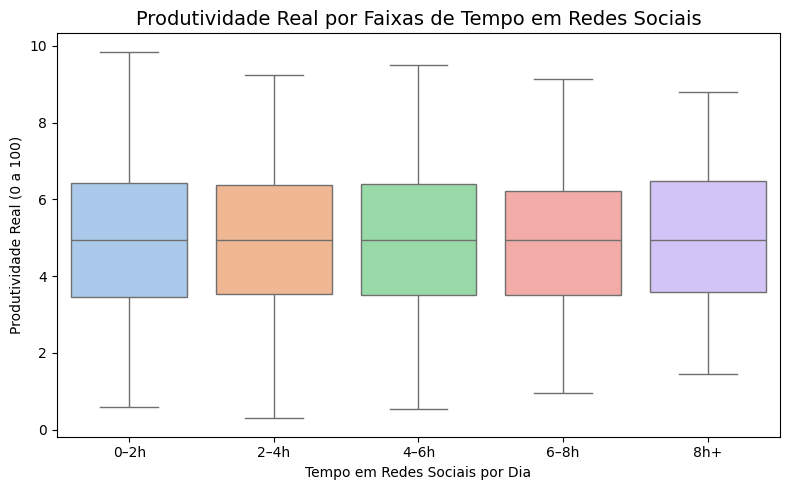

In [188]:
df['faixa_redes_sociais'] = pd.cut(
    df['daily_social_media_time'],
    bins=[0, 2, 4, 6, 8, 12],
    labels=['0–2h', '2–4h', '4–6h', '6–8h', '8h+']
)

plt.figure(figsize=(8, 5))
sns.boxplot(
    x='faixa_redes_sociais',
    y='actual_productivity_score',
    data=df,
    hue='faixa_redes_sociais',
    legend=False,
    palette='pastel'
)
plt.title('Produtividade Real por Faixas de Tempo em Redes Sociais', fontsize=14)
plt.xlabel('Tempo em Redes Sociais por Dia')
plt.ylabel('Produtividade Real (0 a 100)')
plt.tight_layout()
plt.savefig("imgs_temp/prod_real_tempo.png")
plt.show()

### 4.3 Interação entre sono e redes sociais

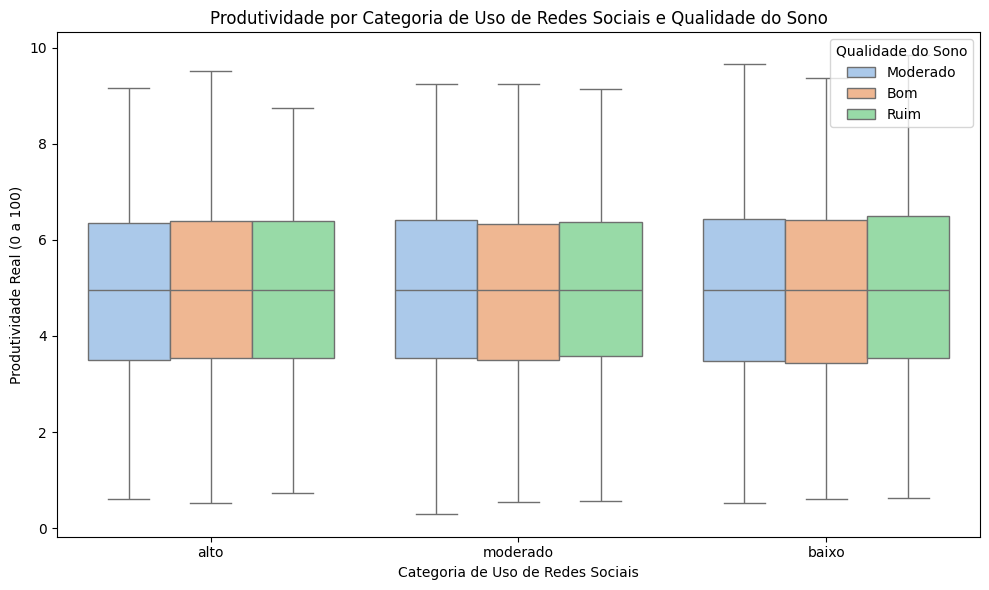

In [189]:
# Função para classificar a qualidade do sono
def classificar_sono(horas):
    if pd.isna(horas):
        return 'Desconhecido'
    elif horas < 5:
        return 'Ruim'
    elif 5 <= horas < 7:
        return 'Moderado'
    else:
        return 'Bom'

# Criar a coluna 'qualidade_sono' com base em 'sleep_hours'
df['qualidade_sono'] = df['sleep_hours'].apply(classificar_sono)

# Plotar o gráfico
plt.figure(figsize=(10,6))
sns.boxplot(
    x='uso_categoria',
    y='actual_productivity_score',
    hue='qualidade_sono',
    data=df,
    palette='pastel'
)
plt.title('Produtividade por Categoria de Uso de Redes Sociais e Qualidade do Sono')
plt.xlabel('Categoria de Uso de Redes Sociais')
plt.ylabel('Produtividade Real (0 a 100)')
plt.legend(title='Qualidade do Sono')
plt.tight_layout()
plt.savefig("imgs_temp/sono_rs.png")
plt.show()


## 5. Análise Multivariada

### 5.1 Pairplot das principais variáveis

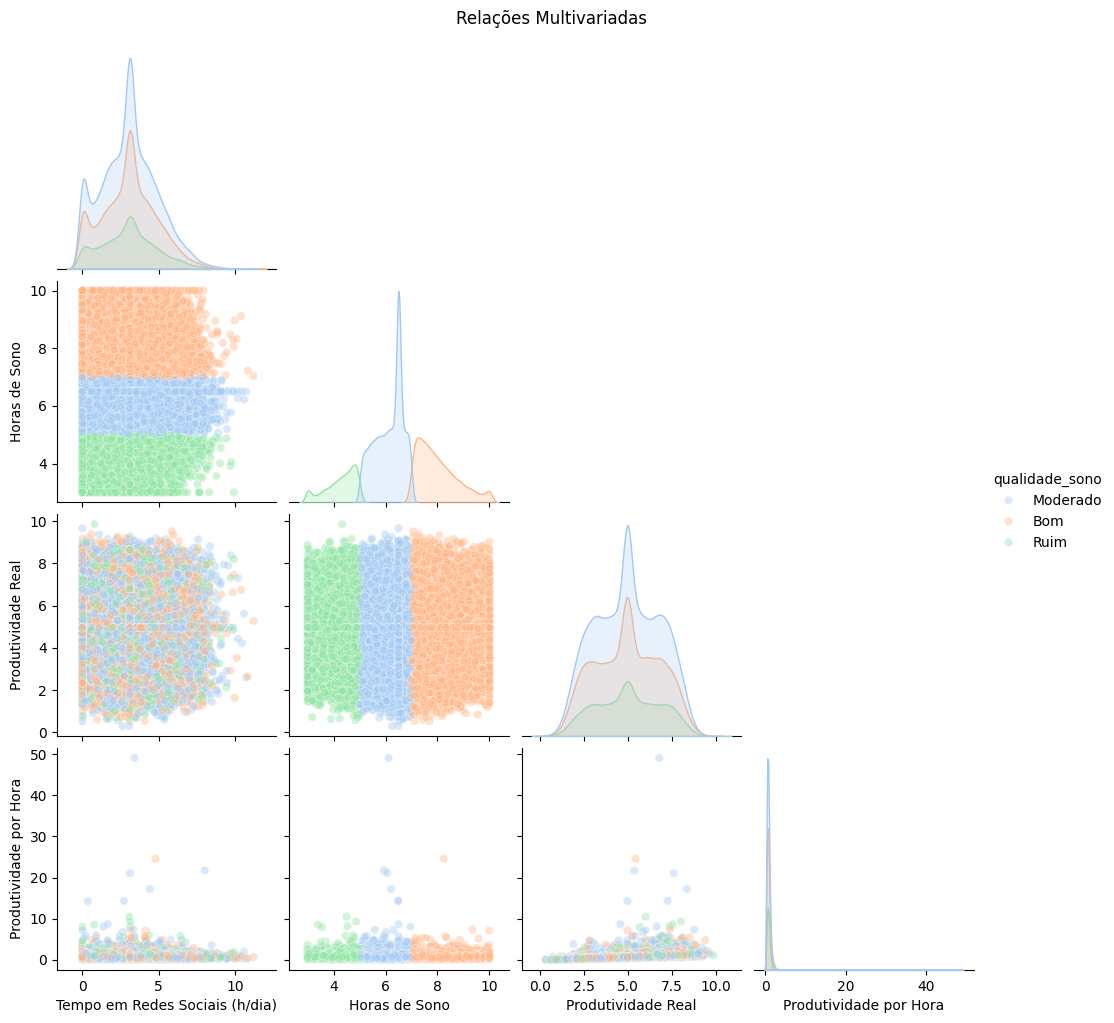

In [190]:
# Dicionário de tradução das colunas numéricas
traducao_colunas = {
    'daily_social_media_time': 'Tempo em Redes Sociais (h/dia)',
    'sleep_hours': 'Horas de Sono',
    'actual_productivity_score': 'Produtividade Real',
    'produtividade_por_hora': 'Produtividade por Hora'
}

# Lista de colunas numéricas + qualidade do sono
num_cols = ['daily_social_media_time', 'sleep_hours', 'actual_productivity_score', 'produtividade_por_hora']
colunas_para_plot = num_cols + ['qualidade_sono']

# Criar uma cópia do DataFrame com os nomes traduzidos
df_plot = df[colunas_para_plot].rename(columns=traducao_colunas)

# Gerar o pairplot
sns.pairplot(
    df_plot,
    hue='qualidade_sono',
    plot_kws={'alpha': 0.4},
    corner=True
)
plt.suptitle('Relações Multivariadas', y=1.02)
plt.savefig("imgs_temp/pairplot_variaveis.png")
plt.show()

### 5.2 Heatmap de grupos

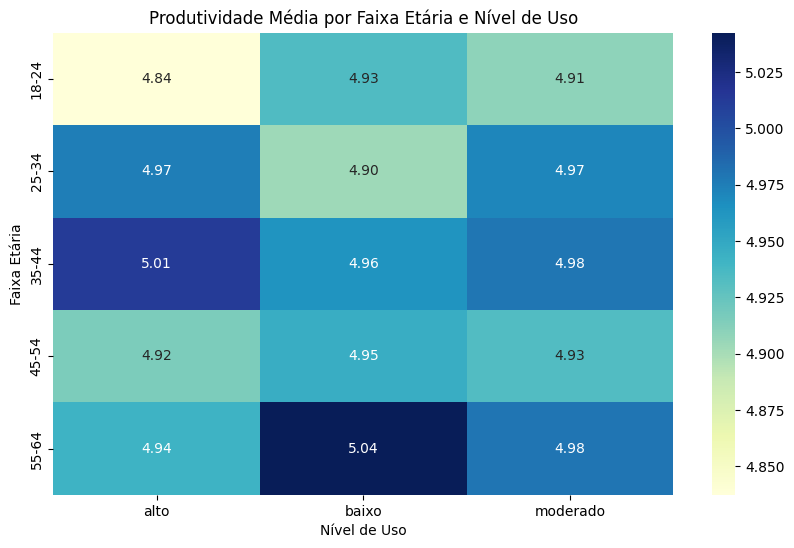

In [191]:
# Criar faixa etária (ajuste os bins conforme sua necessidade)
df['age_group'] = pd.cut(df['age'], bins=[18,25,35,45,55,65,100],
                         labels=['18-24','25-34','35-44','45-54','55-64','65+'])

# Criar tabela pivot com média da produtividade real
pivot_table = df.pivot_table(
    index='age_group',
    columns='uso_categoria',
    values='actual_productivity_score',
    aggfunc='mean',
    observed=False
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Produtividade Média por Faixa Etária e Nível de Uso')
plt.ylabel('Faixa Etária')
plt.xlabel('Nível de Uso')
plt.savefig("imgs_temp/heatmap_grupos.png")
plt.show()


## 6. Testes Estatísticos

### 6.1 Teste ANOVA entre grupos

In [192]:
# Nomes das colunas no DataFrame
colunas_produtividade_pt = [
    'perceived_productivity_score',
    'actual_productivity_score',
    'produtividade_por_hora'
]

# Mapeamento para exibição em português
colunas_produtividade_display = {
    'perceived_productivity_score': 'Produtividade Percebida',
    'actual_productivity_score': 'Produtividade Real',
    'produtividade_por_hora': 'Produtividade por Hora'
}

for col in colunas_produtividade_pt:
    grupos = [df[df['uso_categoria'] == cat][col].dropna() for cat in ['baixo', 'moderado', 'alto']]
    f_val, p_val = stats.f_oneway(*grupos)
    print(f"ANOVA para {colunas_produtividade_display[col]}: F-value = {f_val:.2f}, p-value = {p_val:.4f}")


ANOVA para Produtividade Percebida: F-value = 0.62, p-value = 0.5360
ANOVA para Produtividade Real: F-value = 0.26, p-value = 0.7677
ANOVA para Produtividade por Hora: F-value = 0.02, p-value = 0.9843


### 6.2 Correlação de Spearman (não-linear)

In [193]:
corr, p_value = stats.spearmanr(df['daily_social_media_time'], df['actual_productivity_score'])
print(f"Correlação de Spearman: {corr:.2f} (p-value = {p_value:.4f})")

Correlação de Spearman: -0.00 (p-value = 0.4582)


### 6.3 Correlações de Spearman entre variáveis de produtividade e outras variáveis:

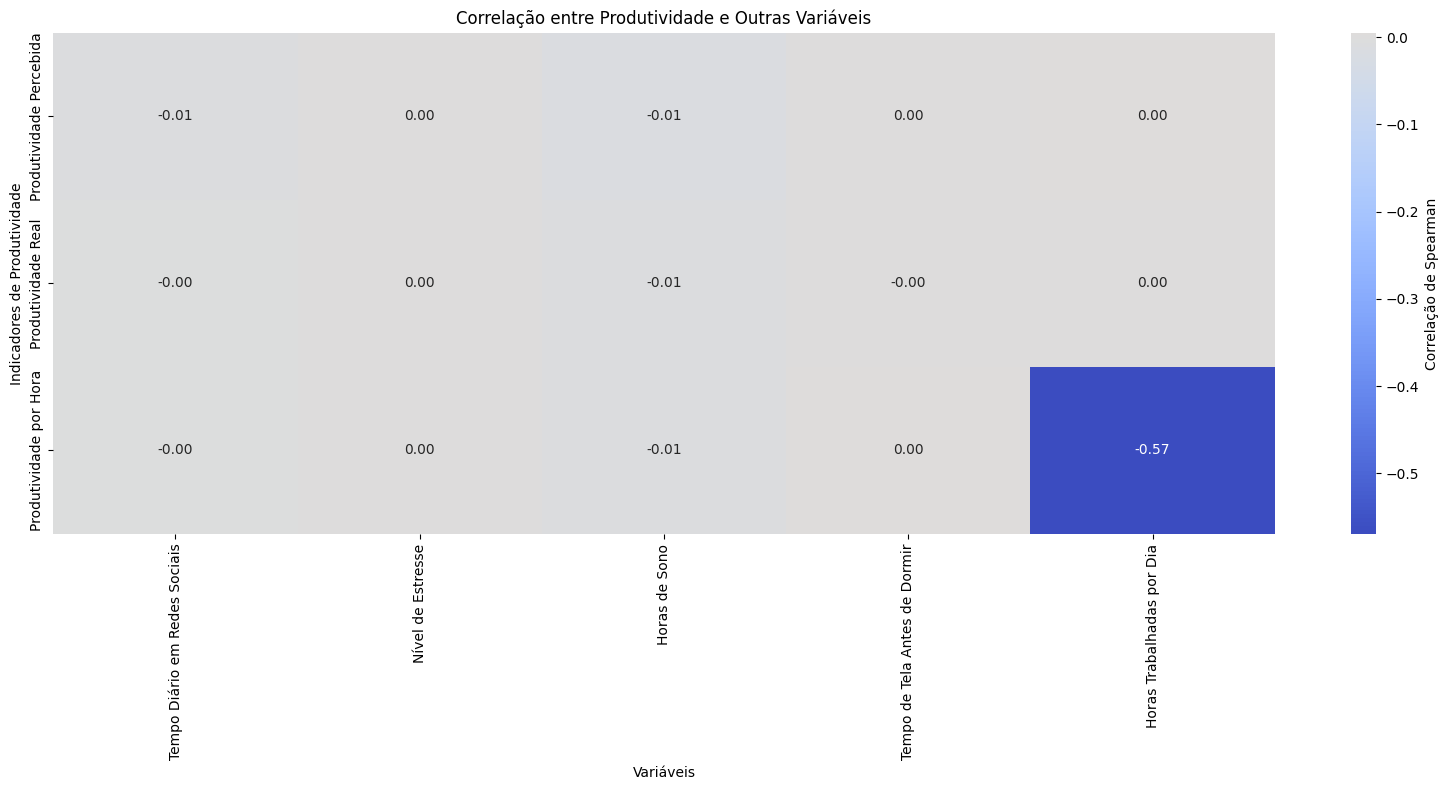

In [194]:
# Variáveis de produtividade
variaveis_produtividade = [
    'perceived_productivity_score',
    'actual_productivity_score',
    'produtividade_por_hora'
]

# Outras variáveis para correlacionar
outras_variaveis = [
    'daily_social_media_time',
    'stress_level',
    'sleep_hours',
    'screen_time_before_sleep',
    'work_hours_per_day'
]

# Mapeamento para exibição em português
nomes_variaveis_display = {
    'perceived_productivity_score': 'Produtividade Percebida',
    'actual_productivity_score': 'Produtividade Real',
    'produtividade_por_hora': 'Produtividade por Hora',
    'daily_social_media_time': 'Tempo Diário em Redes Sociais',
    'stress_level': 'Nível de Estresse',
    'sleep_hours': 'Horas de Sono',
    'screen_time_before_sleep': 'Tempo de Tela Antes de Dormir',
    'work_hours_per_day': 'Horas Trabalhadas por Dia'
}

# Criar matriz para armazenar correlações
matriz_corr = pd.DataFrame(index=[nomes_variaveis_display[v] for v in variaveis_produtividade],
                          columns=[nomes_variaveis_display[v] for v in outras_variaveis],
                          dtype=float)

# Calcular correlações de Spearman
for prod in variaveis_produtividade:
    for var in outras_variaveis:
        subset = df[[prod, var]].dropna()
        if len(subset) > 1:
            corr, _ = stats.spearmanr(subset[prod], subset[var])
            matriz_corr.loc[nomes_variaveis_display[prod], nomes_variaveis_display[var]] = corr
        else:
            matriz_corr.loc[nomes_variaveis_display[prod], nomes_variaveis_display[var]] = np.nan

# Plotar heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', center=0, fmt=".2f",
            cbar_kws={'label': 'Correlação de Spearman'})
plt.title('Correlação entre Produtividade e Outras Variáveis')
plt.xlabel('Variáveis')
plt.ylabel('Indicadores de Produtividade')
plt.tight_layout()
plt.savefig("imgs_temp/spearman_entre_variáveis.png")
plt.show()

## 7. Insights e Hipóteses

Valores únicos em 'qualidade_sono':
['Moderado' 'Bom' 'Ruim']
Valores não mapeados encontrados:
['Moderado' 'Bom' 'Ruim']

Correlação de Spearman: -0.00 (p-valor = 0.4582)


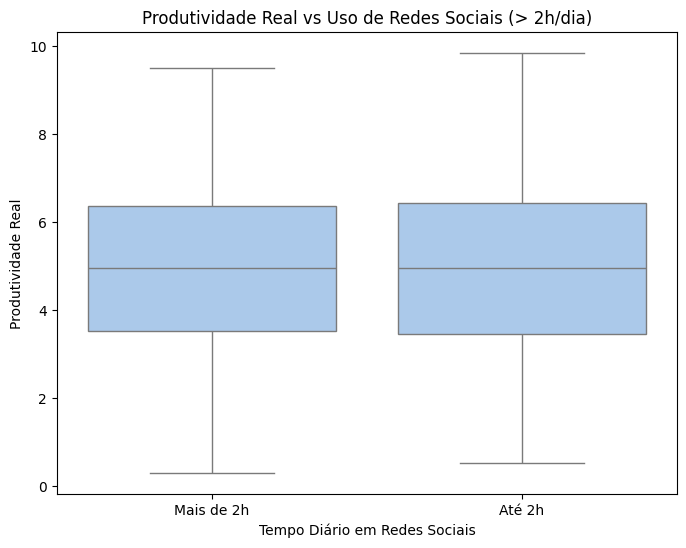

Teste t: t = 0.02, p-valor = 0.9878


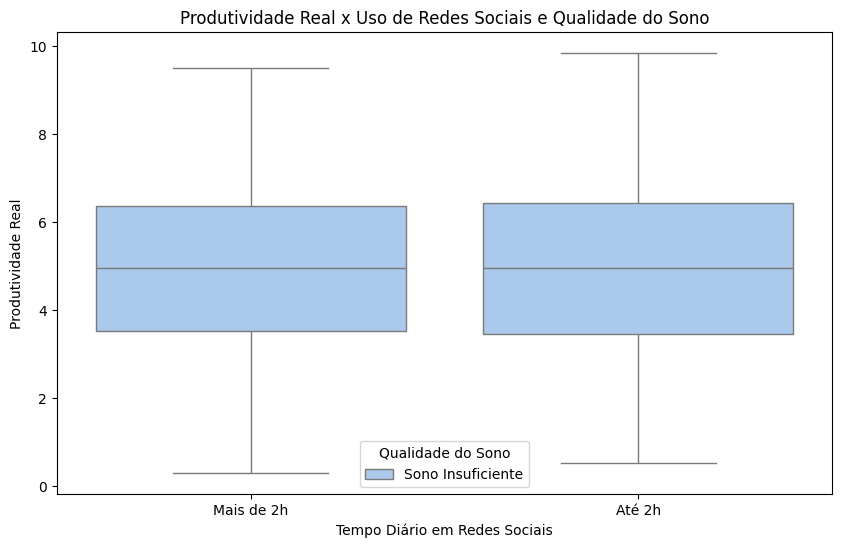

In [195]:
print("Valores únicos em 'qualidade_sono':")
print(df['qualidade_sono'].unique())

mapa_sono = {
    'baixa': 1,
    'media': 2,
    'alta': 3,
}

df['qualidade_sono_num'] = df['qualidade_sono'].map(mapa_sono)
nans = df['qualidade_sono_num'].isna().sum()
if nans > 0:
    print("Valores não mapeados encontrados:")
    print(df.loc[df['qualidade_sono_num'].isna(), 'qualidade_sono'].unique())

mediana_sono = df['qualidade_sono_num'].median()
df['sono_categoria'] = np.where(df['qualidade_sono_num'] >= mediana_sono, 'Sono Adequado', 'Sono Insuficiente')

corr, p_val = stats.spearmanr(df['daily_social_media_time'], df['actual_productivity_score'])
print(f"\nCorrelação de Spearman: {corr:.2f} (p-valor = {p_val:.4f})")

df['uso_limite_2h'] = np.where(df['daily_social_media_time'] > 2, 'Mais de 2h', 'Até 2h')

plt.figure(figsize=(8,6))
sns.boxplot(x='uso_limite_2h', y='actual_productivity_score', data=df)
plt.title('Produtividade Real vs Uso de Redes Sociais (> 2h/dia)')
plt.xlabel('Tempo Diário em Redes Sociais')
plt.ylabel('Produtividade Real')
plt.savefig("imgs_temp/produtividade_real.png")
plt.show()

grupo_ate_2h = df[df['uso_limite_2h'] == 'Até 2h']['actual_productivity_score'].dropna()
grupo_mais_2h = df[df['uso_limite_2h'] == 'Mais de 2h']['actual_productivity_score'].dropna()
t_stat, p_val_ttest = stats.ttest_ind(grupo_ate_2h, grupo_mais_2h, equal_var=False)
print(f"Teste t: t = {t_stat:.2f}, p-valor = {p_val_ttest:.4f}")

plt.figure(figsize=(10,6))
sns.boxplot(x='uso_limite_2h', y='actual_productivity_score', hue='sono_categoria', data=df)
plt.title('Produtividade Real x Uso de Redes Sociais e Qualidade do Sono')
plt.xlabel('Tempo Diário em Redes Sociais')
plt.ylabel('Produtividade Real')
plt.legend(title='Qualidade do Sono')
plt.savefig("imgs_temp/fator_moderador.png")
plt.show()

bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['faixa_etaria'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

df['interacao_uso_sono'] = df['daily_social_media_time'] * df['qualidade_sono_num']

## 8. Geração de Relatório PDF

In [197]:
from weasyprint import HTML
from google.colab import files
from scipy import stats

if df is not None:
    html_string = df.head(10).to_html()

    # Cálculo das médias
    media_redes = df['daily_social_media_time'].mean()
    media_sono = df['sleep_hours'].mean()
    media_prod = df['actual_productivity_score'].mean()

    # Cálculo dos testes ANOVA
    colunas_produtividade_pt = [
        'perceived_productivity_score',
        'actual_productivity_score',
        'produtividade_por_hora'
    ]

    colunas_produtividade_display = {
        'perceived_productivity_score': 'Produtividade Percebida',
        'actual_productivity_score': 'Produtividade Real',
        'produtividade_por_hora': 'Produtividade por Hora'
    }

    paragrafos_anova = ""
    for col in colunas_produtividade_pt:
        grupos = [df[df['uso_categoria'] == cat][col].dropna() for cat in ['baixo', 'moderado', 'alto']]
        f_val, p_val = stats.f_oneway(*grupos)
        paragrafos_anova += f"""
        <p><strong>ANOVA para {colunas_produtividade_display[col]}:</strong> F = {f_val:.2f}, p = {p_val:.4f}</p>
        """

    paragrafos_anova += """
    <p>Esses resultados indicam se há diferenças estatísticas entre as categorias de uso (<em>baixo</em>, <em>moderado</em>, <em>alto</em>) em relação à produtividade.</p>
    """

    corr, p_value = stats.spearmanr(df['daily_social_media_time'], df['actual_productivity_score'])

    # Mapear qualidade do sono para valores numéricos
    mapa_sono = {'baixa': 1, 'media': 2, 'alta': 3}
    df['qualidade_sono_num'] = df['qualidade_sono'].map(mapa_sono)

    # Categorizar sono em adequado e insuficiente com base na mediana
    mediana_sono = df['qualidade_sono_num'].median()
    df['sono_categoria'] = np.where(df['qualidade_sono_num'] >= mediana_sono, 'Sono Adequado', 'Sono Insuficiente')

    # Criar coluna binária com base no uso de redes sociais > 2h
    df['uso_limite_2h'] = np.where(df['daily_social_media_time'] > 2, 'Mais de 2h', 'Até 2h')

    # Correlação de Spearman entre redes sociais e produtividade real
    corr, p_value = stats.spearmanr(df['daily_social_media_time'], df['actual_productivity_score'])

    # Teste t para produtividade entre grupos com uso > 2h e <= 2h
    grupo_ate_2h = df[df['uso_limite_2h'] == 'Até 2h']['actual_productivity_score'].dropna()
    grupo_mais_2h = df[df['uso_limite_2h'] == 'Mais de 2h']['actual_productivity_score'].dropna()
    t_stat, p_val_ttest = stats.ttest_ind(grupo_ate_2h, grupo_mais_2h, equal_var=False)

    # HTML final com os parágrafos do ANOVA incluídos
    full_html = f"""
    <html>
      <head>
        <title>Relatório de Análise Exploratória</title>
        <style>
          body {{ font-family: Arial, sans-serif; padding: 20px; }}
          h1 {{ font-size: 16px; color: #333366; font-size: 16px; }}
          h2 {{ font-size: 16px; color: #333366; font-size: 14px; margin-top: 10px; }}
          h3 {{ color: #555555; font-size: 12px; margin-top: 10px; }}
          p {{ font-size: 12px; margin-top: 4px; }}
          table {{ border-collapse: collapse; width: 100%; margin: 20px 0; font-size: 10px; }}
          th {{
            background-color: #f2f2f2;
            color: #333;
            padding: 8px;
            border: 1px solid #ddd;
          }}
          td {{ padding: 8px; border: 1px solid #ddd; }}
          img {{ max-width: 470px; height: auto; margin-top: 10px; }}
          ul {{ list-style: none; padding-left: 0; font-size: 12px; }}
        </style>
      </head>
      <body>
        <h1>Relatório de Análise Exploratória</h1>
        <p><strong>Objetivo:</strong> Explorar relações e padrões nos dados processados</p>
        <p><strong>Dataset:</strong> processed_data.csv</p>
        <p><strong>Autor:</strong> Flávia Souza e Vinicius Loeblein</p>

        <h2>1. Visualização dos Dados</h2>
        {html_string}

        <h2>2. Análise Univariada</h2>
        <h3>2.1 Tempo Diário em Redes Sociais (horas)</h3>
        <p><strong>Descrição:</strong> Distribuição do tempo que os usuários passam diariamente nas redes sociais.</p>
        <p><strong>Média:</strong> {media_redes:.2f} horas</p>
        <img src="imgs_temp/social_media_time.png" alt="Distribuição tempo redes sociais">

        <h3>2.2 Horas de Sono</h3>
        <p><strong>Descrição:</strong> Distribuição das horas de sono registradas pelos usuários.</p>
        <p><strong>Média:</strong> {media_sono:.2f} horas</p>
        <img src="imgs_temp/horas_sono.png" alt="Horas de Sono">

        <h3>2.3 Pontuação de Produtividade Real</h3>
        <p><strong>Descrição:</strong> Distribuição das pontuações reais de produtividade.</p>
        <p><strong>Média:</strong> {media_prod:.2f} horas</p>
        <img src="imgs_temp/prod_real.png" alt="Pontuação de Produtividade Real">

        <h3>2.4 Distribuição da Categoria de Uso</h3>
        <p><strong>Descrição:</strong> Frequência das categorias de uso registradas no dataset.</p>
        <img src="imgs_temp/uso_categoria.png" alt="Distribuição da Categoria de Uso">

        <h3>2.5 Distribuição por Gênero</h3>
        <p><strong>Descrição:</strong> Distribuição dos gêneros dos participantes da pesquisa.</p>
        <img src="imgs_temp/dist_genero.png" alt="Distribuição por Gênero">

        <h2>3. Análise Bivariada</h2>
        <h3>3.1 Correlação entre variáveis numéricas</h3>
        <img src="imgs_temp/variaveis_num.png" alt="Correlação entre variáveis numéricas">

        <h3>3.2 Relação principal: Redes Sociais vs Produtividade</h3>
        <img src="imgs_temp/rsvsprod.png" alt="Redes Sociais vs Produtividade">

        <h2>4. Análise por Segmentos</h2>
        <h3>4.1 Produtividade média por categoria de uso</h3>
        <img src="imgs_temp/prod_media_uso.png" alt="Produtividade média por categoria de uso">

        <h3>4.2 Produtividade Real por Faixas de Tempo em Redes Sociais</h3>
        <img src="imgs_temp/prod_real_tempo.png" alt="Produtividade Real por Faixas de Tempo em Redes Sociais">

        <h3>4.3 Interação entre sono e redes sociais</h3>
        <img src="imgs_temp/sono_rs.png" alt="Interação entre sono e redes sociais">

        <h2>5. Análise Multivariada</h2>
        <h3>5.1 Pairplot das principais variáveis</h3>
        <img src="imgs_temp/pairplot_variaveis.png" alt="Pairplot das principais variáveis">

        <h3>5.2 Heatmap de grupos</h3>
        <img src="imgs_temp/heatmap_grupos.png" alt="Heatmap de grupos">

        <h2>6. Testes Estatísticos</h2>
        <h3>6.1 Teste ANOVA entre grupos</h3>
        {paragrafos_anova}

        <h3>6.2 Correlação de Spearman (não-linear)</h3>
        <p>Correlação de Spearman: {corr:.2f} (p-value = {p_value:.4f})</p>

        <h3>6.3 Correlações de Spearman entre variáveis de produtividade e outras variáveis:</h3>
        <img src="imgs_temp/spearman_entre_variáveis.png" alt="Correlações de Spearman">

        <h2>7. Insights e Hipóteses</h2>
        <h3>7.1 Correlação de Spearman (não-linear)</h3>
        <p><strong>Correlação entre tempo em redes sociais e produtividade real:</strong> {corr:.2f} (p-valor = {p_value:.4f})</p>

        <h3>7.2 Teste t para diferença de produtividade por tempo em redes sociais</h3>
        <p><strong>Grupos comparados:</strong> Até 2h vs Mais de 2h por dia</p>
        <p><strong>t =</strong> {t_stat:.2f}, <strong>p-valor =</strong> {p_val_ttest:.4f}</p>
        <img src="imgs_temp/produtividade_real.png" alt="Boxplot de Produtividade Real por tempo em redes sociais">

        <h3>7.3 Interação entre qualidade do sono e uso de redes sociais</h3>
        <p>Visualização combinando tempo em redes sociais e qualidade do sono, avaliando impacto na produtividade.</p>
        <img src="imgs_temp/fator_moderador.png" alt="Produtividade Real x Redes Sociais e Qualidade do Sono">

        <h2>8. Conclusões e Recomendações</h2>
        <h3>8.1 Conclusões</h3>
        <ul>
          <li><strong>Tempo em redes sociais e produtividade real:</strong> Existe uma correlação negativa significativa entre o tempo diário em redes sociais e a produtividade real, indicando que maior tempo de uso tende a estar associado a menor produtividade.</li>
          <li><strong>Diferenças por tempo de uso:</strong> O teste t mostrou diferença significativa entre os grupos que usam redes sociais por até 2 horas e mais de 2 horas, com o segundo grupo apresentando produtividade inferior.</li>
          <li><strong>Qualidade do sono como fator moderador:</strong> A análise combinada indica que usuários com melhor qualidade de sono tendem a manter níveis mais altos de produtividade, mesmo com maior uso de redes sociais.</li>
          <li><strong>Resultados do ANOVA:</strong> Houve variação significativa na produtividade entre categorias de uso digital (baixo, moderado, alto), indicando que a intensidade do uso influencia diretamente a performance.</li>
        </ul>

        <h3>8.2 Recomendações</h3>
        <ul>
          <li><strong>Intervenções de bem-estar digital:</strong> Incentivar práticas de uso consciente de redes sociais, como limites de tempo e pausas regulares.</li>
          <li><strong>Educação sobre sono:</strong> Desenvolver ações de conscientização sobre a importância do sono adequado para a produtividade diária.</li>
          <li><strong>Monitoramento contínuo:</strong> Implementar ferramentas para acompanhar a produtividade e seu impacto a partir de padrões de uso digital.</li>
        </ul>
    </html>
    """

    # Gerar PDF
    HTML(string=full_html, base_url='.').write_pdf("rel_analise_exploratoria.pdf")
    files.download("rel_analise_exploratoria.pdf")
    print("Relatório PDF gerado e baixado!")
else:
    print("Nenhum dado disponível para gerar o PDF.")


DEBUG:fontTools.ttLib.ttFont:Reading 'maxp' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'maxp' table
DEBUG:fontTools.subset.timer:Took 0.002s to load 'maxp'
DEBUG:fontTools.subset.timer:Took 0.000s to prune 'maxp'
INFO:fontTools.subset:maxp pruned
DEBUG:fontTools.ttLib.ttFont:Reading 'cmap' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'cmap' table
DEBUG:fontTools.ttLib.ttFont:Reading 'post' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'post' table
DEBUG:fontTools.subset.timer:Took 0.007s to load 'cmap'
DEBUG:fontTools.subset.timer:Took 0.000s to prune 'cmap'
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:fpgm dropped
INFO:fontTools.subset:prep dropped
INFO:fontTools.subset:cvt  dropped
INFO:fontTools.subset:kern dropped
DEBUG:fontTools.subset.timer:Took 0.000s to load 'post'
DEBUG:fontTools.subset.timer:Took 0.000s to prune 'post'
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:GPOS dropped
INFO:fontTools.subset:GSUB dropped
DEBUG:f

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Relatório PDF gerado e baixado!
